In [1]:
import numpy as np
import warnings
import matplotlib.pyplot as plt
import tt

def assemble_solve_SimplePDE(coeff, getLinearSystem=True):
  """
  Solve simple diffusion problem on [0,1] using P1 finite elements.
  """

  [num_coeff, nx, I] = np.shape(coeff)

  coeff = coeff[0,:,:]

  if np.min(coeff) <= 0:
    warnings.warn(f'Non positive components')
  
  A = []
  F = []
  U = []

  for i in range(I):
    Fi = np.full((nx+1,1), 10/(nx)) # assume RHS = 1 
    Fi[[0,-1]] = 0 # boundary condition
    F.append(Fi) 
    Ai = np.zeros((nx+1,nx+1))

    # assemble A, coeff piecewise constant on grid
    Ai.flat[nx+2::nx+2] = (coeff[1:,i] + coeff[:-1, i]) * nx # set diag
    Ai.flat[1::nx+2] = -coeff[:,i] * nx # set first upper diag
    Ai.flat[nx+1::nx+2] = -coeff[:,i] * nx # set first lower diag
    Ai[[0,-1]] = 0
    Ai[0,0] = 1
    Ai[-1,-1] = 1
    A.append(Ai)
    U.append(np.linalg.solve(Ai, F[i]).reshape((-1,1)))

  if getLinearSystem:
    return U,A,F
  else:
    return U


def coeff(X, Nx, Ny, offset, var):
  c = np.full(len(X), offset,dtype=float)
  for i, x in enumerate(X):
    # print(i)
    for k in range(1, len(x)):
      c[i] += np.exp(-k) * np.sin(np.pi*k*x[0]/(Nx-1)) * (x[k]/(Ny-1) - 0.5) * var
  return c

### PDE test

Solve the PDE using P1 finite elements for a random parameter

Text(0, 0.5, 'A')

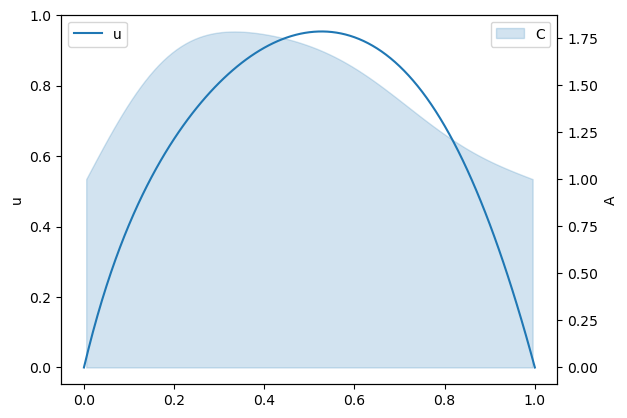

In [16]:
Nx = 100      # spatial resolution
Ny = 10       # parameter resolution
n_param = 5   # number of parameters
offset = 1    # parameter mean
var = 4       # 'variance' of the parameters

# get random params
y = np.random.randint(0,Ny, n_param)
X = np.hstack([np.arange(Nx).reshape((-1,1)), np.tile(y, [Nx,1])])

cfun = lambda x : coeff(x, Nx, Ny, offset, var)

C_true = cfun(X)

U,A,F = assemble_solve_SimplePDE(C_true.reshape(1,-1,1))
U = np.ravel(U)

fig, ax = plt.subplots()
ax2 = ax.twinx()

x = np.arange(Nx+1) / Nx
midpoints = (np.arange(Nx) + 0.5) / Nx
p = ax.plot(x, U, label='u')
ax2.fill_between((np.arange(len(C_true)) + 0.5) / (len(C_true)), C_true, alpha=0.2, color=p[0].get_color(), label='C')

ax.set_ylabel('u')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
ax2.set_ylabel('A')